In [ ]:
cd /content/drive/MyDrive/DSCNITP/Human Activity Detection

/content/drive/MyDrive/DSCNITP/Human Activity Detection


Importing All Required Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset ( Training & Testing )

In [3]:
train_df = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace = True,names=list(range(0,561)))

train_df['Subject'] = pd.read_csv("UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True)

train_df["activity"] = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)


# Data Prepration

In [5]:
features = list()
with open("UCI HAR Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])


In [6]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [7]:
test_df = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace = True,names=list(range(0,561)))

test_df['Subject'] = pd.read_csv("UCI HAR Dataset/test/subject_test.txt", header = None, squeeze = True)

test_df["activity"] = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)


In [8]:
test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,Subject,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.974418,-0.999953,-0.999330,-0.998933,-0.995236,-0.978739,-0.969982,-0.749578,-0.899226,-0.553813,0.174684,-0.051332,0.034200,0.153639,0.030767,-0.129277,0.446100,-0.419496,0.271493,-0.225769,0.416376,-0.286445,-0.063792,-0.167111,0.544916,...,-1.000000,-0.968254,0.148649,-0.619905,-0.887178,-0.976297,-0.971248,-0.966029,-0.974878,-0.996129,-0.976297,-0.999458,-0.975174,-0.566733,-0.948718,-0.285636,-0.446478,-0.756855,-0.985562,-0.985843,-0.984217,-0.988566,-0.992021,-0.985562,-0.999850,-0.984015,-0.849081,-0.936508,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,-0.560831,-0.825894,0.849179,0.670700,0.829897,-0.975283,-0.999954,-0.999467,-0.998823,-0.993498,-0.967032,-0.976257,-0.590576,-0.740206,-0.799419,0.115570,-0.028923,-0.032804,0.294340,0.000630,-0.045272,0.168419,-0.068156,0.074384,0.027138,-0.145931,-0.050197,0.235151,0.290487,0.457718,...,-1.000000,-0.809524,0.422249,-0.543096,-0.831313,-0.977007,-0.969619,-0.968915,-0.973746,-0.996970,-0.977007,-0.999429,-0.976111,-0.555564,-1.000000,-0.349061,-0.319763,-0.691739,-0.990498,-0.990572,-0.988406,-0.992653,-0.992505,-0.

In [9]:
train_df['activity'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: activity, dtype: int64

In [10]:
train_df.to_csv('train.csv',index_label=False)

In [11]:
test_df.to_csv('test.csv',index_label=False)

In [13]:
train_df.shape


(7352, 563)

In [14]:
test_df.shape

(2947, 563)

In [27]:
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]

In [28]:
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [31]:
print(X_train.shape)
print(y_train.shape)

(7352, 562)
(7352,)


# **Model Part**

# **1) Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini',min_samples_split=2,n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **2) Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=4)
dsc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **Predicting with test Data**

In [55]:
y_pred_rfc=rfc.predict(X_test)
y_pred_rfc

array([5, 5, 5, ..., 2, 2, 1])

In [57]:
y_pred_dsc=dsc.predict(X_test)
y_pred_dsc

array([5, 5, 5, ..., 2, 1, 2])

## **Metrics**

## Accuracy

In [47]:
#Random Forest 
rfc.score(X_test,y_test)

0.9212758737699356

In [48]:
#Decision Tree
dsc.score(X_test,y_test)

0.8615541228367831

# Classification Report

In [58]:
#1)Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       0.88      0.98      0.93       496
           2       0.89      0.90      0.89       471
           3       0.96      0.83      0.89       420
           4       0.90      0.89      0.90       491
           5       0.90      0.91      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [59]:
#2)Decision Tree
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dsc))

              precision    recall  f1-score   support

           1       0.82      0.91      0.86       496
           2       0.84      0.77      0.80       471
           3       0.88      0.85      0.87       420
           4       0.83      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



# Confusion Matrix

In [63]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix


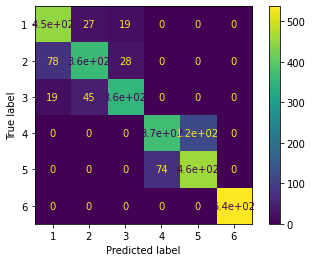

In [68]:
#1) Random Forest
plot_confusion_matrix(dsc, X_test, y_test)
plt.show()

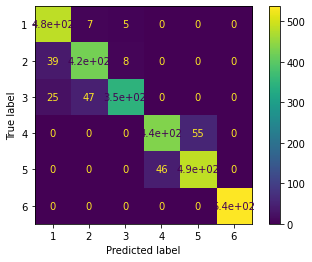

In [70]:
#2) Decision Tree
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

# F1 Score

In [71]:
from sklearn.metrics import f1_score

In [74]:
f1_score(y_test,y_pred_rfc,average='macro')

0.9190015226191401

In [75]:
f1_score(y_test,y_pred_dsc,average='macro')

0.8590019672302965

# AUC Score

In [76]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr')

0.99462742943853

In [79]:
roc_auc_score(y_test, dsc.predict_proba(X_test), multi_class='ovr')

0.9166560497087158

# **Saving the Model**

In [80]:
import pickle

In [82]:
pickle.dump(dsc,open("model_decisionTree.pkl","wb+"),protocol=pickle.HIGHEST_PROTOCOL)

In [84]:
pickle.dump(rfc,open("model_randomForest.pkl","wb+"),protocol=pickle.HIGHEST_PROTOCOL)